This notebook for Cellpose application is adoptted from https://github.com/MouseLand/cellpose/blob/main/notebooks/run_cellpose.ipynb

Students can develop from here and try different models and parameters.

Liya Ding

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from cellpose import utils, io
from tifffile import imread, imwrite

(-0.5, 255.5, 255.5, -0.5)

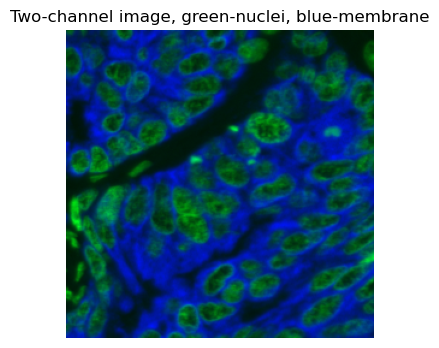

In [46]:
# read in image sequence ( get the data ready with the "get_images.ipynb" in data preparation part and use the correct path)
filename_C0 = '/mnt/d/lding/dsi_clinic/cellsegmentation/data/tissuenet_v1.1/tissuenet_v1.1_test/img_C0/img_C0_0046.tiff'
filename_C1 = '/mnt/d/lding/dsi_clinic/cellsegmentation/data/tissuenet_v1.1/tissuenet_v1.1_test/img_C1/img_C1_0046.tiff'
img_C0 = io.imread(filename_C0)
img_C1 = io.imread(filename_C1)

# briefly normalize the images, could improve
img_C0 = img_C0/img_C0.max()
img_C1 = img_C1/img_C1.max()

# make a RGB image, R zeros, G nuclei, B membrane
img_2ch = np.stack([np.zeros_like(img_C0), img_C0,img_C1])

plt.figure(figsize=(4,4))
#display of the image need dimension x*y*3, so swap the order for display
plt.imshow(np.transpose(img_2ch, (1,2,0)))
plt.title('Two-channel image, green-nuclei, blue-membrane')
plt.axis('off')


In [51]:
# Run Cellpose

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto3')

# input 3 ch RGB, with R empty, so channels [1,2] for nuclei and membrane
masks, flows, styles, diams = model.eval(img_2ch,channels=[1,2])


In [52]:
# save the segmentation results -- the labels, to a tif file for future evaluation 
output_dir = '/mnt/d/lding/dsi_clinic/cellsegmentation/data/tissuenet_v1.1/tissuenet_v1.1_test/img_C0/C0_selected_seg_stardist'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

imwrite(os.path.join(output_dir, 'testimage_cellpose_cyto3_resultlabels.tif'), masks)
    

/tmp/ipykernel_986916/267262634.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20 = cm.get_cmap('tab20', 10)
/tmp/ipykernel_986916/267262634.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  newmap = cm.get_cmap('tab20', 4000+1)


(-0.5, 255.5, 255.5, -0.5)

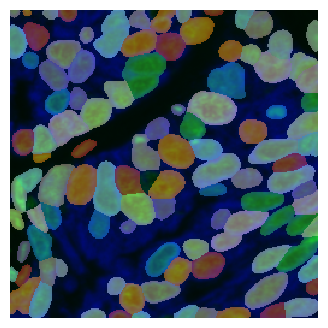

In [53]:
# display the segmentation results with our own colormap

# build the colormap with iterative tab20
tab20 = cm.get_cmap('tab20', 10)
for i in range(10):
    tab20.colors = np.concatenate([tab20.colors,tab20.colors],axis=0)    
tab20.colors = np.concatenate([np.zeros([1,4]),tab20.colors],axis=0)
newmap = cm.get_cmap('tab20', 4000+1)
newmap.colors = tab20.colors[0:4000+1,:]
newmap.colors[0,:]  = [0,0,0,1] # black for background

# display
plt.figure(figsize=(4,4))
plt.imshow(np.transpose(img_2ch, (1,2,0)), cmap='gray')
plt.imshow(masks, cmap=newmap, interpolation='None',alpha=0.5)
plt.axis('off')


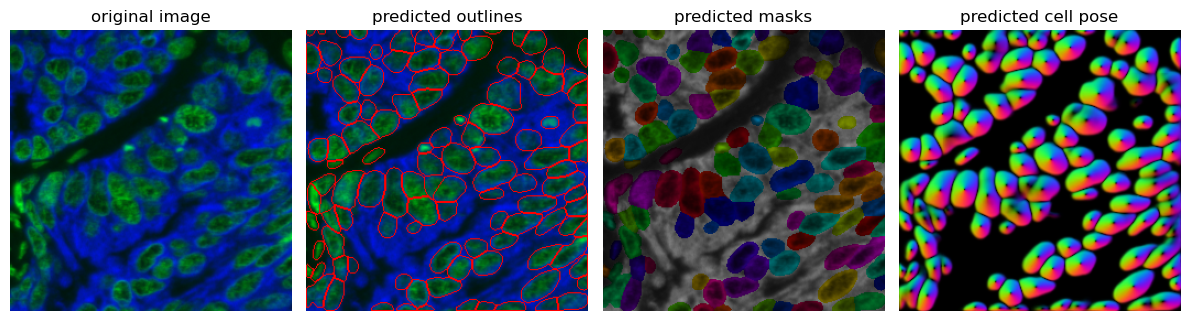

In [54]:
# Display the results with cellpose's tool of displaying 4 panels
from cellpose import plot
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, np.transpose(img_2ch, (1,2,0)), masks, flows[0])
plt.tight_layout()
plt.show()